📌 Step 1: Data Loading & Inspection

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('placementdata.csv')

# Basic inspection
print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nMissing values:")
print(df.isna().sum())


First 5 rows:
   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78

📌 Step 2: Data Cleaning with NumPy/Pandas

In [34]:
# Fill missing CGPA with median (NumPy approach)
cgpa_median = np.nanmedian(df['CGPA'])
df['CGPA'] = df['CGPA'].fillna(cgpa_median)

# Convert categorical to numerical (Pandas map)
df['PlacementStatus'] = df['PlacementStatus'].map({'Placed': 1, 'Not Placed': 0})
df['PlacementTraining'] = df['PlacementTraining'].map({'Yes': 1, 'No': 0})
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})


📌 Step 3: Data Analysis Operations

In [35]:
#A. Basic Statistics with NumPy
print("\nBasic statistics:")
print("Mean CGPA:", np.mean(df['CGPA']))
print("Median Aptitude Score:", np.median(df['AptitudeTestScore']))
print("Standard deviation of Soft Skills Rating:", np.std(df['SoftSkillsRating']))



Basic statistics:
Mean CGPA: 7.698010000000001
Median Aptitude Score: 80.0
Standard deviation of Soft Skills Rating: 0.4116016501424862


In [36]:
#B. Advanced Pandas Operations
# Groupby analysis
training_effect = df.groupby('PlacementTraining')['PlacementStatus'].mean()
print("\nPlacement rate by training:")
print(training_effect)

# Filtering
high_cgpa_placed = df[(df['CGPA'] > 8.0) & (df['PlacementStatus'] == 1)]
print("\nNumber of placed students with CGPA > 8.0:", len(high_cgpa_placed))



Placement rate by training:
PlacementTraining
0    1.0
1    1.0
Name: PlacementStatus, dtype: float64

Number of placed students with CGPA > 8.0: 2457


In [37]:
#C. Pivot Tables
pivot = pd.pivot_table(df,
                       index='PlacementTraining',
                       columns='ExtracurricularActivities',
                       values='PlacementStatus',
                       aggfunc='mean')
print("\nPlacement rate by training and extracurricular activities:")
print(pivot)




Placement rate by training and extracurricular activities:
ExtracurricularActivities    0    1
PlacementTraining                  
0                          1.0  1.0
1                          1.0  1.0


In [40]:
#  Creating arrays from columns
cgpa_array = np.array(df['CGPA'])
apt_array = np.array(df['AptitudeTestScore'])
print("CGPA array:", cgpa_array[:5])
print("Aptitude array:", apt_array[:5])


CGPA array: [7.5 8.9 7.3 7.5 8.3]
Aptitude array: [65 90 82 85 86]


In [41]:
#  Indexing and slicing from CGPA array
print("First CGPA:", cgpa_array[0])
print("CGPAs from index 2 to 6:", cgpa_array[2:7])


First CGPA: 7.5
CGPAs from index 2 to 6: [7.3 7.5 8.3 7.  7.7]


In [42]:
#  Indexing and slicing from CGPA array
print("First CGPA:", cgpa_array[0])
print("CGPAs from index 2 to 6:", cgpa_array[2:7])


First CGPA: 7.5
CGPAs from index 2 to 6: [7.3 7.5 8.3 7.  7.7]


In [43]:
# Reshape CGPA array into 2D (if total is divisible)
reshaped_cgpa = cgpa_array[:12].reshape(4, 3)
print("Reshaped CGPA (4x3):\n", reshaped_cgpa)


Reshaped CGPA (4x3):
 [[7.5 8.9 7.3]
 [7.5 8.3 7. ]
 [7.7 7.7 6.5]
 [7.8 8.3 7.9]]


In [44]:
# Concatenate CGPA and Aptitude arrays
combined = np.concatenate((cgpa_array[:5], apt_array[:5]))
print("Concatenated CGPA + Aptitude:", combined)

# Split combined array
split_combined = np.array_split(combined, 2)
print("Split arrays:", split_combined)


Concatenated CGPA + Aptitude: [ 7.5  8.9  7.3  7.5  8.3 65.  90.  82.  85.  86. ]
Split arrays: [array([7.5, 8.9, 7.3, 7.5, 8.3]), array([65., 90., 82., 85., 86.])]


In [45]:
# ✅ Apply universal functions
print("Squared CGPA values:", np.square(cgpa_array[:5]))
print("Log of Aptitude scores:", np.log1p(apt_array[:5]))
print("Exponential of Soft Skills:", np.exp(df['SoftSkillsRating'][:5]))


Squared CGPA values: [56.25 79.21 53.29 56.25 68.89]
Log of Aptitude scores: [4.18965474 4.51085951 4.41884061 4.4543473  4.46590812]
Exponential of Soft Skills: 0     81.450869
1     54.598150
2    121.510418
3     81.450869
4     90.017131
Name: SoftSkillsRating, dtype: float64


In [46]:
#  Aggregate statistics
print("Mean CGPA:", np.mean(cgpa_array))
print("Max Aptitude Score:", np.max(apt_array))
print("Std Dev of Soft Skills:", np.std(df['SoftSkillsRating']))


Mean CGPA: 7.698010000000001
Max Aptitude Score: 90
Std Dev of Soft Skills: 0.4116016501424862


In [47]:
#  Add bonus marks to Aptitude scores (broadcasting)
bonus = 5
updated_apt = apt_array + bonus
print("Aptitude after bonus:", updated_apt[:5])


Aptitude after bonus: [70 95 87 90 91]


In [48]:
#  Mask: CGPA > 8
high_cgpa = cgpa_array > 8
print("Students with CGPA > 8:", cgpa_array[high_cgpa])

# Fancy indexing
print("CGPA at indices 1, 3, 5:", cgpa_array[[1, 3, 5]])


Students with CGPA > 8: [8.9 8.3 8.3 ... 8.4 8.9 8.4]
CGPA at indices 1, 3, 5: [8.9 7.5 7. ]


In [49]:
#  Sorting CGPA and Aptitude
sorted_cgpa = np.sort(cgpa_array)
print("Sorted CGPA:", sorted_cgpa)

sorted_apt = np.sort(apt_array)
print("Sorted Aptitude Scores:", sorted_apt)


Sorted CGPA: [6.5 6.5 6.5 ... 9.1 9.1 9.1]
Sorted Aptitude Scores: [60 60 60 ... 90 90 90]


In [51]:
#  Structured array using StudentID and CGPA
structured = np.array(list(zip(df['StudentID'], df['CGPA'])),
                      dtype=[('student', 'U20'), ('cgpa', 'f4')])
print("First 5 records in structured array:")
print(structured[:5])


First 5 records in structured array:
[('1', 7.5) ('2', 8.9) ('3', 7.3) ('4', 7.5) ('5', 8.3)]


📌 Step 4: Data Visualization

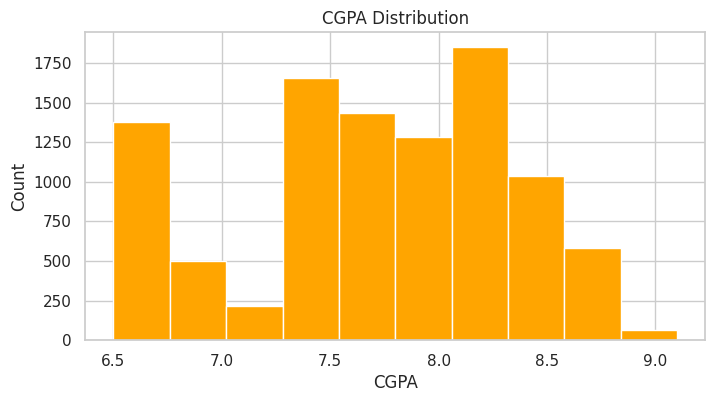

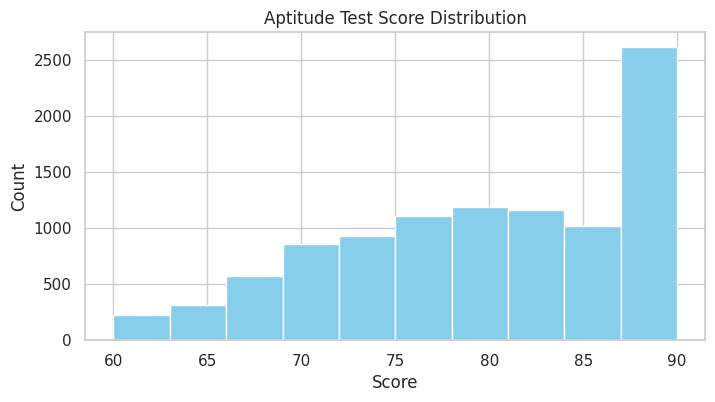

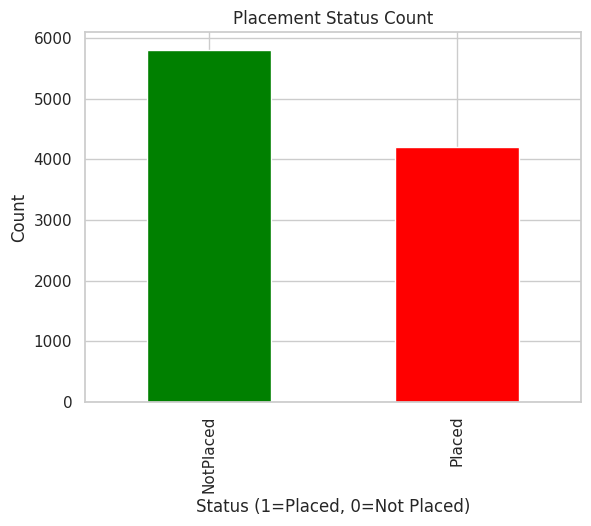

In [30]:
#A. Basic Matplotlib Plots
# Histogram of CGPA
plt.figure(figsize=(8, 4))
plt.hist(df['CGPA'], bins=10, color='orange')
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

# Histogram of Aptitude Score
plt.figure(figsize=(8, 4))
plt.hist(df['AptitudeTestScore'], bins=10, color='skyblue')
plt.title('Aptitude Test Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Bar plot of Placement Status
df['PlacementStatus'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Placement Status Count")
plt.xlabel("Status (1=Placed, 0=Not Placed)")
plt.ylabel("Count")
plt.show()


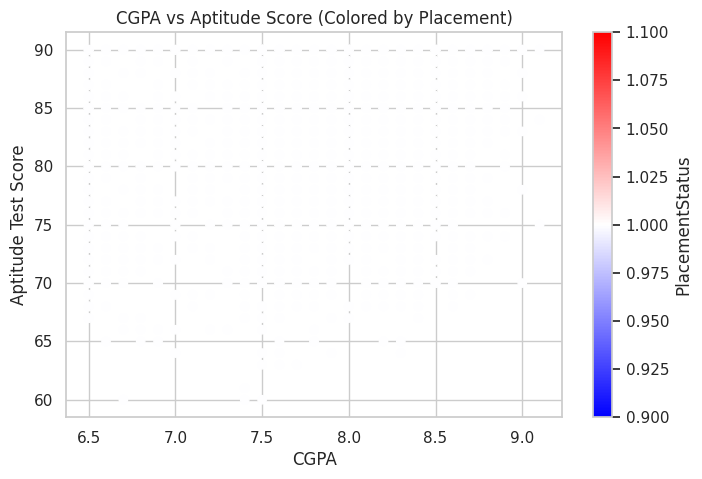

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(df['CGPA'], df['AptitudeTestScore'], c=df['PlacementStatus'], cmap='bwr')
plt.xlabel('CGPA')
plt.ylabel('Aptitude Test Score')
plt.title('CGPA vs Aptitude Score (Colored by Placement)')
plt.colorbar(label='PlacementStatus')
plt.show()


📌 Step 5: Advanced NumPy Operations

In [39]:
# Normalize CGPA using z-score
cgpa_mean = np.mean(df['CGPA'])
cgpa_std = np.std(df['CGPA'])
df['CGPA_zscore'] = (df['CGPA'] - cgpa_mean) / cgpa_std

# Boolean indexing: filter students with CGPA between 7.0 and 9.0
cgpa_values = df['CGPA'].values
mid_cgpa_students = df[np.logical_and(cgpa_values >= 7.0, cgpa_values <= 9.0)]
print("\nNumber of students with CGPA between 7.0 and 9.0:", len(mid_cgpa_students))



Number of students with CGPA between 7.0 and 9.0: 8244
